# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])

In [4]:
df = pd.merge(df, pd.DataFrame({'total_EOS' : df[df.token == 'EOS'].groupby('account')['amount'].sum()}), on='account').reset_index()
df['amount_ratio'] = df['amount']/df['total_EOS']
df.sort_values('amount')

,index,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action,total_EOS,amount_ratio
119,119,eosio.vpay,2022-10-21 22:00:02,2022-10-21 22:00:02,127.0384,EOS,eosio.vpay,eosvenezuela,274426331,d2c797d49f359cb8943aff2d3cb4d27828239c0f4683d2...,producer vote pay,eosio.token,transfer,64131.5083,0.001981
208,208,eosio.vpay,2022-10-23 07:10:12,2022-10-23 07:10:12,130.0937,EOS,eosio.vpay,eosbixinboot,274665078,a33ee5093949bb4d1ba351aefa25012401b56572a4d379...,producer vote pay,eosio.token,transfer,64131.5083,0.002029
147,147,eosio.vpay,2022-10-22 07:10:05,2022-10-22 07:10:05,130.6153,EOS,eosio.vpay,eosbixinboot,274492307,1ac936625dbedf20364eb3e81ada1205714f26e10cf185...,producer vote pay,eosio.token,transfer,64131.5083,0.002037
86,86,eosio.vpay,2022-10-21 07:09:18,2022-10-21 07:09:18,131.6298,EOS,eosio.vpay,eosbixinboot,274319490,369308ac916f29bfcbb65bc8300869b6a71b270d1d9138...,producer vote pay,eosio.token,transfer,64131.5083,0.002052
179,179,eosio.vpay,2022-10-22 23:00:06,2022-10-22 23:00:06,134.4285,EOS,eosio.vpay,eosvenezuela,274606277,f65eb8fb01b6569549ca66fb8449641d14cc13cd93e29f...,producer vote pay,eosio.token,transfer,64131.5083,0.002096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,eosio.vpay,2022-10-22 13:32:42,2022-10-22 13:32:42,684.4808,EOS,eosio.vpay,eosinfstones,274538205,99b7ed656488a66039444f01e3a61670265dd87fea5a92...,producer vote pay,eosio.token,transfer,64131.5083,0.010673
221,221,eosio.vpay,2022-10-23 13:43:48,2022-10-23 13:43:48,687.3838,EOS,eosio.vpay,eosinfstones,274712304,a572b295e4ea661d36dd25c444249c27846479bff85396...,producer vote pay,eosio.token,transfer,64131.5083,0.010718
123,123,eosio.vpay,2022-10-22 00:03:42,2022-10-22 00:03:42,696.6950,EOS,eosio.vpay,newdex.bp,274441166,5fa20d887d825e7a09618b47829c85177fa209c8fa92fe...,producer vote pay,eosio.token,transfer,64131.5083,0.010864
62,62,eosio.vpay,2022-10-21 00:03:31,2022-10-21 00:03:31,699.3684,EOS,eosio.vpay,newdex.bp,274268407,353555074901da28cd6dd64b0b64e73f12fdc86a91c8ad...,producer vote pay,eosio.token,transfer,64131.5083,0.010905


In [5]:
df

,index,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action,total_EOS,amount_ratio
0,0,eosio.bpay,2022-10-21 00:03:31,2022-10-21 00:03:31,344.5222,EOS,eosio.bpay,newdex.bp,274268407,353555074901da28cd6dd64b0b64e73f12fdc86a91c8ad...,producer block pay,eosio.token,transfer,21404.6738,0.016096
1,1,eosio.bpay,2022-10-21 00:03:49,2022-10-21 00:03:49,344.5222,EOS,eosio.bpay,aus1genereos,274268443,504ff8fadb162c2cde9777c0ee8cd69301a97579ce1e15...,producer block pay,eosio.token,transfer,21404.6738,0.016096
2,2,eosio.bpay,2022-10-21 00:27:31,2022-10-21 00:27:31,344.0244,EOS,eosio.bpay,starteosiobp,274271284,1a5719345a8777b36ce6b016159cd7f2e8ed4f358f1db7...,producer block pay,eosio.token,transfer,21404.6738,0.016072
3,3,eosio.bpay,2022-10-21 01:23:42,2022-10-21 01:23:42,343.9339,EOS,eosio.bpay,eosflytomars,274278026,0439ccdbaac893021ee1bd6e28ed89bcbc85ad09b69234...,producer block pay,eosio.token,transfer,21404.6738,0.016068
4,4,eosio.bpay,2022-10-21 01:40:55,2022-10-21 01:40:55,344.5178,EOS,eosio.bpay,eoslaomaocom,274280092,ef6b1486a94b26d025219652ad98bf2d10e7551a9628af...,producer block pay,eosio.token,transfer,21404.6738,0.016095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,eosio.vpay,2022-10-23 20:12:15,2022-10-23 20:12:15,429.8638,EOS,eosio.vpay,truststaking,274758884,028114b56d03897e07617b54413c950ad62baa6077f3a6...,producer vote pay,eosio.token,transfer,64131.5083,0.006703
238,238,eosio.vpay,2022-10-23 21:55:36,2022-10-23 21:55:36,143.7439,EOS,eosio.vpay,eosnodeonebp,274771282,66897ab288b75bbbcbea260f40ded2a17563818d91bd4d...,producer vote pay,eosio.token,transfer,64131.5083,0.002241
239,239,eosio.vpay,2022-10-23 23:02:00,2022-10-23 23:02:00,199.4362,EOS,eosio.vpay,bp.dfs,274779248,6f73fc8beb715e7ac99f2683b70cb909dfd6faa1d7ddca...,producer vote pay,eosio.token,transfer,64131.5083,0.003110
240,240,eosio.vpay,2022-10-23 23:24:19,2022-10-23 23:24:19,189.3243,EOS,eosio.vpay,eossv12eossv,274781925,ddd60523e4f9baa085d310325302e4224a2d853042476f...,producer vote pay,eosio.token,transfer,64131.5083,0.002952


In [6]:
from pysankey import sankey
import seaborn as sns

In [7]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


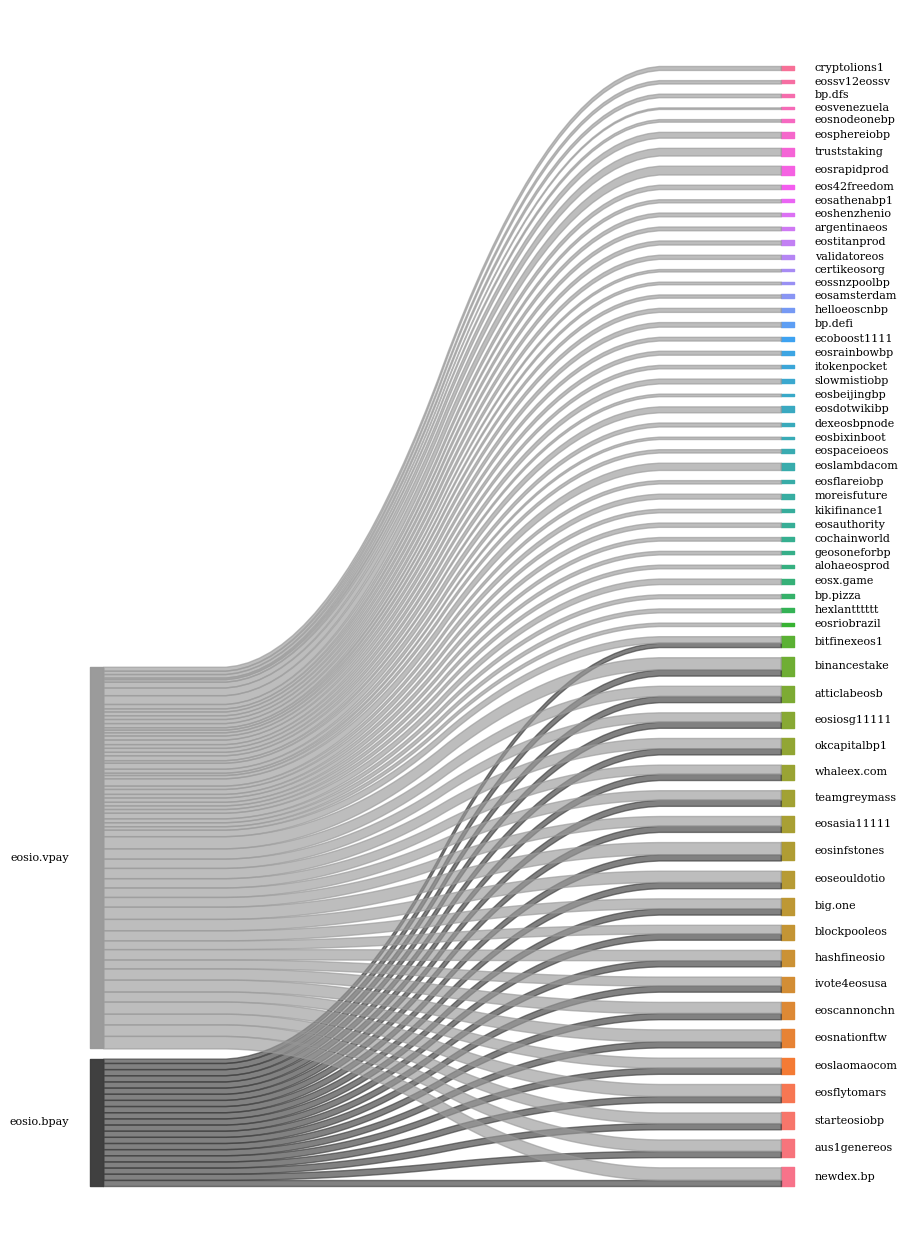

In [8]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)